SAS & HSE, Applied Time Series Forecasitng , Fall 2022

<font color="blue"> HW #1 </font>

<span style="color:black; font-size: 12pt"></span>

Alexey Romanenko,
<font color="blue">alexromsput@gmail.com</font>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- https://otexts.com/fpp2/expsmooth.html

**Оформление дз**: 
- Присылайте выполненное задание в гугл-форму https://forms.gle/G9e9L3ue3cFhNppf7
- Выполненное дз сохраните в файл <Surname>_fall2022_hw1.ipynb, например, ivanov_fall2022_hw1.ipynb

**Вопросы**:
- Присылайте вопросы в slack в соответствующий канал

**Deadilne**: <font color="red"> 11-Dec-2022 11:59:59 pm CET </font>

В случае присланного решения позже дедлайна максимальный бал буде снижен согласно формуле

$$МаксимальныйБалл=\max\bigl(1/3,\log_2⁡(1.23 + 0.77 * max(0,(1-ДнейПослеДедлайна/14))) \bigr).$$
График зависимости максимально возможного балла за ДЗ от просрочки дедлайна приведён ниже:

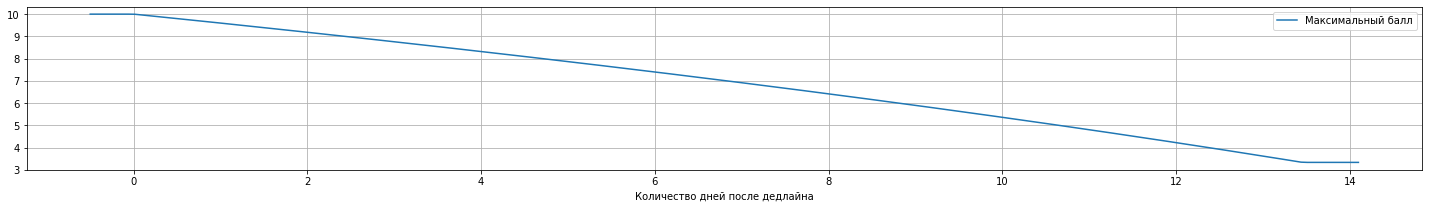

In [ ]:
import pandas as pd
import numpy as np
a = 2
ax = pd.DataFrame(data = [[x, min(10, 10*max(1/3, np.log(a-0.77 + 0.77*max(0, (1-x/14)))/np.log(a)))] for x in np.linspace(-0.5,14.1,200)], columns = ['Количество дней после дедлайна', 'Максимальный балл']).set_index('Количество дней после дедлайна').plot(figsize = (25,3), grid = True)

<h1 align="center">Check Questions (5%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма Simple Exponential Smoothing при изменении параметра $\alpha$ от 0 до 1.

🦉 **ответ:**  при росте коэффициента экспоненциального сглаживания растет значимость, т.е. весов, соответствующих поздним наблюдениям поведения временного ряда в истории. При малых $\alpha$ все наблюдения в истории приобретают почти одинаковый вес и становятся равнозначными в прогнозе.

**Вопрос 2**: Докажите равенство выражений в $\color{blue}{рекуррентной~форме}$ и в $\color{red} {форме~корректировки~на~ошибку}$ для модели Хольта.

$$        l_t = \color{blue}{\alpha y_t + (1-\alpha) (l_{t-1} + b_{t-1} )} = \color{red}{\hat y_{t} + \alpha e_t}$$ 

$$b_t = \color{blue}{\beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1}} = \color{red}{b_{t-1}+ \alpha\beta e_t}.$$</td>

🦉 **ответ:**  из ноутбука 3_Holt, Winters, Theil-Wage.ipynb формулы немного другие:
$$       \hat l_t = \color{blue}{\alpha y_t + (1-\alpha) (\hat l_{t-1} + \hat b_{t-1} )} = \color{red}{\hat y_{t} + \alpha e_t}$$ 

Первое доказывается просто применением формулы для прогноза $\hat y_{t} = \hat l_{t-1} + \hat b_{t-1}$, тогда 
$\hat l_t = \color{blue}{\alpha y_t + (1-\alpha) (\hat l_{t-1} + \hat b_{t-1} )}=\alpha y_t + (1-\alpha)\hat y_{t}=\color{red}{\hat y_{t} + \alpha e_t}$.
$$b_t =\color{blue}{ \beta (\hat l_{t} - \hat l_{t-1} ) + (1-\beta) \hat b_{t-1}} = \color{red}{\hat b_{t-1}+ \alpha\beta e_t}.$$

Во втором используем первое равенство. Раскроем скобки
$\color{blue}{ \beta (\hat l_{t} - \hat l_{t-1} ) + (1-\beta) \hat b_{t-1}}=\hat b_{t-1}+\beta (\hat l_{t} - \hat l_{t-1})-\beta\hat b_{t-1}$.

Покажем, что $\alpha\beta e_t=\beta (\hat l_{t} -  \hat l_{t-1})-\beta\hat b_{t-1}$. Так как 
$\hat l_t - \hat l_{t-1} - \hat b_{t-1}=\hat l_{t}-\hat y_t=\alpha e_t$. Тогда умножив на $\beta$ получаем $\beta\left(\hat l_t - \hat l_{t-1} - \hat b_{t-1}\right)=\alpha\beta e_t$.

**Вопрос 3**: Каким следует выбрать параметр сглаживания тренда $\beta$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

🦉 **ответ:** 


<h1 align="center"> Practice</h1>

#1. reading data (5%)

Download data and prepare for following time series 
 * <span style="color:blue; font-family:'New Times Roman'; font-size:14pt"> description of the target ts you can find here  https://docs.google.com/spreadsheets/d/1HwwDZMCVUl-wpdY39TdBBKMwvks9VTe2gIpFtGBu-28/edit#gid=1251818784 </span> sheet "Анализ временных рядов" column C ("ts")



<AxesSubplot:xlabel='Date'>

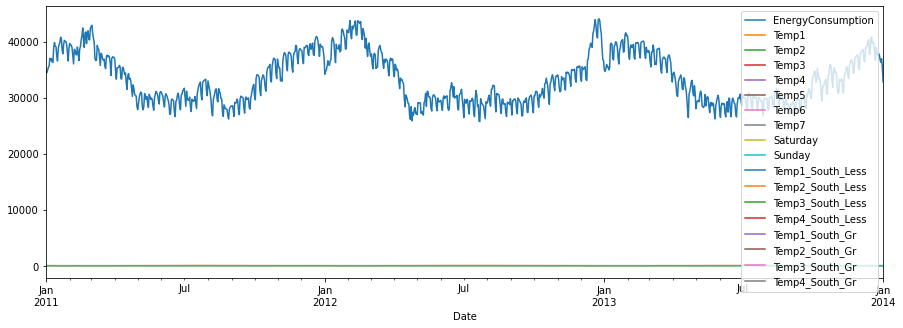

In [138]:
# start with this code
import pandas as pd
import numpy as np
from utils import InitExponentialSmoothing, build_forecast, plot_ts_forecast
from utils import qualityMAPE 

%matplotlib inline


df = pd.read_csv('https://raw.githubusercontent.com/aromanenko/ATSF/main/data/energy_consumption.csv', parse_dates=['Date'])
ts = df[df.id == 4].drop(columns='id').set_index('Date')['2011-01-01':'2014-01-01']

# # Put your code below
ts.plot(figsize=(15,5))

# 2. Build the Forecast with  SES (20%)

You need to apply SES model for the ts.
You can use code from seminars or you can write down your own code using any python lib.

Forecast delay $h=1$ for all point in this task.

* 0) Forecast the ts with SES $\alpha=.1$.
* 1) Split the ts to 4 equal parts: find the best param $\alpha$ of SES for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Is the optimal value close to 0 or 1? (use MAPE as a loss function).
* 2) Draw the forecast that correspond to SES with optimial value $\alpha$
     Conclude whether SES can be used for this TS? If can not than explain why.
* 3) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts.

---



## 1) Search for the optimal $\alpha$ 

In [139]:
import os
import numpy as np
import math
import scipy as sc
import matplotlib.pyplot as plt

In [140]:
# generate forecast values based on particular algorithm
# h - forecast horizon, each point in historical period will be forecasted with delay = h (h-step ahead)
# ts - <pandas data frame> with timestamps in index, each column contains particular timeseries, all of them will be forecasted independently
# AlgName - <str> name of the function that runs forecasting algorithm 
# AlgTitle <str> - a name of the forecasting algorithm
# step <char> - aggregation method of the original data before forecasting
# ParamsArray <array> - array of parameter set, each component of array defines particular forecasting algorithm
def build_forecast(h, ts, alg_name, alg_title, params_array, step='D'):
	FRC_TS = dict()

	for p in params_array:
		frc_horizon = pd.date_range(ts.index[-1], periods=h+1, freq=step)[1:]
		frc_ts = pd.DataFrame(index = ts.index.append(frc_horizon), columns = ts.columns)
	  
		for cntr in ts.columns:
			frc_ts[cntr] = eval(alg_name)(ts[cntr], h, p)

		#         frc_ts.columns = frc_ts.columns+('%s %s' % (alg_title, p))
		FRC_TS['%s %s' % (alg_title, p)] = frc_ts

	return FRC_TS
# Simple Exponential Smoothing
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
def SimpleExponentialSmoothing(x, h=1, Params={}):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    # initialization
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = alpha*x[cntr] + (1-alpha)*y  # = y + alpha*(x[cntr]-y) 
            #else do not nothing
        FORECAST[cntr+h] = y
    return FORECAST

In [141]:
ALPHA = [0.1]
ESParamsArray = [{'alpha':alpha} for alpha in ALPHA]
FRC_ts = build_forecast(h=1, ts=ts, alg_name = 'SimpleExponentialSmoothing', alg_title='SimpleExponentialSmoothing',params_array = ESParamsArray)

In [142]:
# compare ES parameters
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_ts.keys())

ix = ts.loc['2012-07-01':'2013-03-31'].index
for param_cntr in sorted(QualityStr.columns):
    frc_ts = FRC_ts[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts.loc[ix], frc_ts.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

SimpleExponentialSmoothing {'alpha': 0.1}    0.840891
dtype: float64

## 2) draw the forecast with optimial value $\alpha $

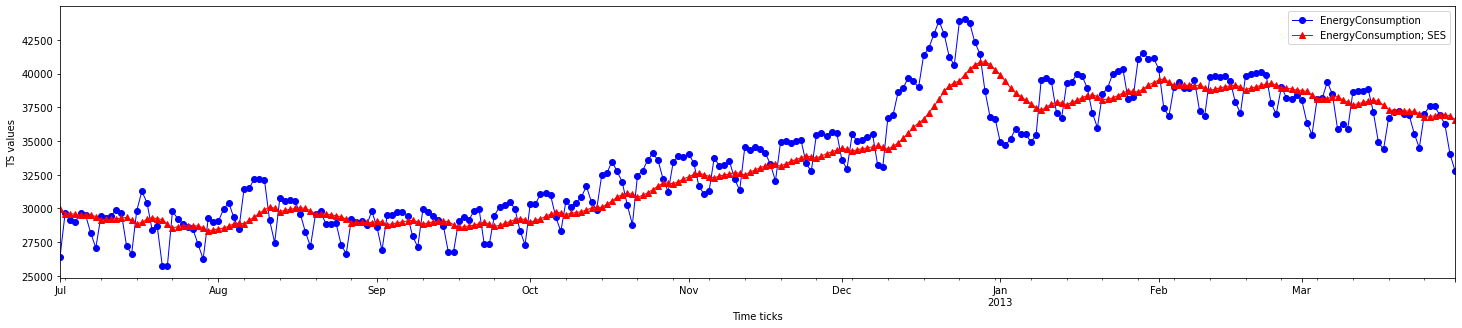

In [143]:
alg_name = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plot_ts_forecast(ts.loc['2012-07-01':'2013-03-31'], FRC_ts[alg_name].loc['2012-07-01':'2013-03-31']
                , ts_num=0, alg_title='SES');

**Question** Does SES follow to the TS components?

🦉 **ответ:** Прогнозный ряд неплохо следует за основным направлением временного ряда, но не учитывет сезонность. Так как объектом исследования является энергопотребление, то здесь разумно предположить, что сезонностью является падение потребления энергии в выходные, т.к. большинство предприятий, заводов не работают. Это заметно на графике ниже, например в период с *2012-07-01* по *2012-07-31*:

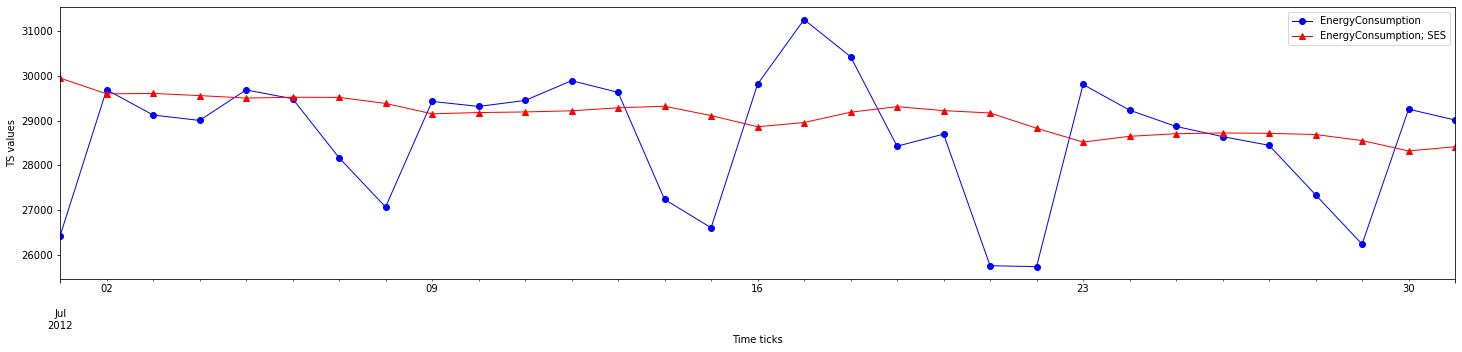

In [144]:
plot_ts_forecast(ts.loc['2012-07-01':'2012-07-31'], FRC_ts[alg_name].loc['2012-07-01':'2012-07-31']
               , ts_num=0, alg_title='SES');

## 3) Calculate loss of the forecast of TS in 4th part of the time series

In [145]:
qualityMAPE(ts.loc['2012-04-01':'2013-12-31'], FRC_ts[alg_name].loc['2012-04-01':'2013-12-31'])[0]

EnergyConsumption    0.043221
Temp1                1.138540
Temp2                     NaN
Temp3                     NaN
Temp4                     NaN
Temp5                     NaN
Temp6                     NaN
Temp7                     NaN
Saturday             0.901591
Sunday               0.837911
Temp1_South_Less          NaN
Temp2_South_Less          NaN
Temp3_South_Less          NaN
Temp4_South_Less          NaN
Temp1_South_Gr            NaN
Temp2_South_Gr            NaN
Temp3_South_Gr            NaN
Temp4_South_Gr            NaN
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then apply it to the ts.

You can use code from seminars or you can write down your own code using any python lib.


Forecast delay $h=1$ for all point in this task.

* 1) Realize Additive Winters model
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ for the whole TS 
* 4) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of SES: is it better? 
* 5) Based on results of 3) and 4) conclude whether Additive Winter's ES is appropriate for this TS.

## 1. Realize Additive Winters model

In [128]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter
def AdditiveWintersExponentialSmoothing(y, h, Params):
    T = len(y)
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = [np.NaN]*(T+h)
    
    l= np.NaN
    s= []
    
    for cntr in range(T):
        if not math.isnan(y[cntr]):
            if math.isnan(l):
                l= y[cntr]
            if len(s)==0:
                # looking in the future
                for i in range(p):
                    s.append(y[i])
            if cntr<p:
                l = alpha*(y[cntr]-s[cntr])+(1-alpha)*l # recurrent smoothing of level 
            else:
                l = alpha*(y[cntr]-s[cntr-p])+(1-alpha)*l # recurrent smoothing of level 
                s.append(gamma*(y[cntr]-l)+(1-gamma)*s[cntr-p])  
        if cntr + h - (1 + (h - 1)//p) * p < 0 or cntr + h - (1 + (h - 1)//p) * p >= len(s):
            FORECAST[cntr+h] = l
        else: 
            FORECAST[cntr+h] = l + s[cntr + h - (1 + (h - 1)//p) * p]
    return FORECAST

## 2. Split the ts to 4 equal parts: find the best params  𝛼  (smoothing of level) and  𝛾  (smoothing of seasonality) for the based on 3-rd part of ts. Use MAPE as a loss function.

In [129]:
ALPHA = np.linspace(0.01,1,10)
GAMMA = np.linspace(0.01,1,10)

wint_params_array = [{'alpha':alpha, 'gamma':gamma, 'seasonality_period':7} for alpha in ALPHA for gamma in GAMMA]
FRC_SEAS_TS = build_forecast(h=1, ts=ts, alg_name = 'AdditiveWintersExponentialSmoothing', alg_title='AWinters'
                              ,params_array = wint_params_array, step='D')

## 3. Draw the forecast that correspond optimal values  𝛼  and  𝛾  for the whole TS

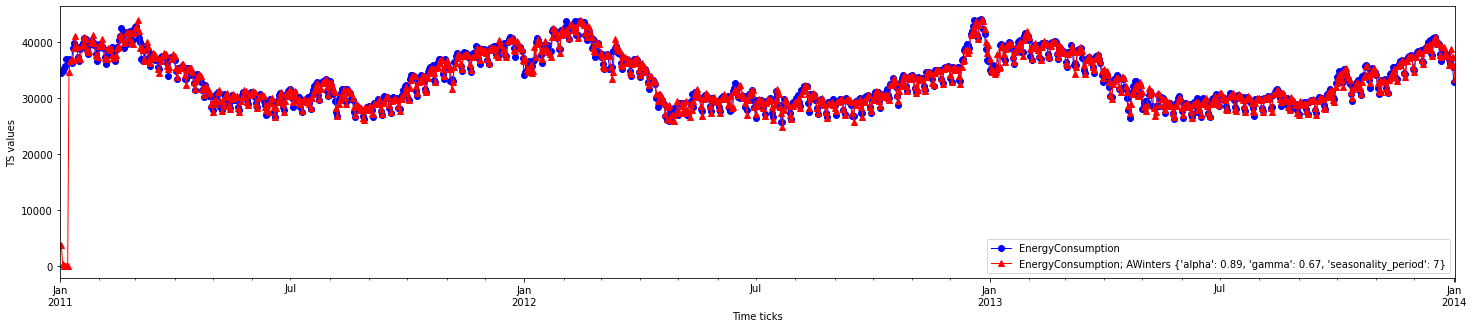

In [146]:
# # forecast accuracy 
QualityStr = pd.DataFrame(index = ts.columns, columns = FRC_SEAS_TS.keys())

ix = ts.loc['2012-07-01':'2013-03-31'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_SEAS_TS[param_cntr]
    QualityStr[param_cntr],_ = qualityMAPE(ts.loc[ix], frc_wage.loc[ix])

# # Draw forecast of the best algorithm (mean on all ts)
alg_name = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plot_ts_forecast(ts.loc[:], FRC_SEAS_TS[alg_name].loc[:]
                , ts_num=0, alg_title=alg_name);

## 4. Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of SES: is it better?

In [147]:
test_period_start = '2013-04-01'
test_period_end = '2013-12-31'
print('MAPE: %s' % qualityMAPE(ts.loc[test_period_start:test_period_end], FRC_SEAS_TS[alg_name].loc[test_period_start:test_period_end])[0])

MAPE: EnergyConsumption    0.015331
Temp1                0.662533
Temp2                     NaN
Temp3                     NaN
Temp4                     NaN
Temp5                     NaN
Temp6                     NaN
Temp7                     NaN
Saturday             0.010342
Sunday               0.128826
Temp1_South_Less          NaN
Temp2_South_Less          NaN
Temp3_South_Less          NaN
Temp4_South_Less          NaN
Temp1_South_Gr            NaN
Temp2_South_Gr            NaN
Temp3_South_Gr            NaN
Temp4_South_Gr            NaN
dtype: float64


🦉 **ответ:**  Mape of EnergyConsumption для SES 0.043221 > 0.015331, поэтому Винтера модель лучше справилась.

## 5. Based on results of 3) and 4) conclude whether Additive Winter's ES is appropriate for this TS.

🦉 **ответ:** на основе построенного прогноза можно утверждать, что аддитивный метод Винтера экспоненциального сглаживания подходит к данному временному ряду и достаточно хорошо строит прогноз. Оценка ошибки mape и построенные графики тоже указывают на то, что этот метод лушче. К тому же здесь уже модель предсказывает сезонность.

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting the ts.

You can use code from seminars or you can write down your own code using any python lib.


Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$
* 4) Calculate MAPE loss of the best forecast of the ts based on 4-th part of the ts. Compare it with accuracy of Additive Winters model: is it better than the last one? 
* *5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

In [ ]:
# Put your code here

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) or/and damped-trend component and then use it for forecasting of the ts

You can use code from seminars or you can write down your own code using any python lib.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M), ESM(Md,M) model.
* 2) Split the ts to 4 equal parts: find the best params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) for the based on 3-rd part of ts (e.g. if time series includes date from 01Jan2020 till 31Dec2021 then 3rd part will be from 1Jul2020 till 30Sep2020). Use MAPE as a loss function.
Note: if you seelct damped trend model then you can set  $\phi$ value expertly (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params. 
* 4) Calculate accuracy of the forecast of TS based on 4-th part of the ts. Compare it with accuracy of Additive Winters model and Theil-Wage model, which model is the best?
* 5) Will be results the same if forecas horizon is different (h = seasonlaity period of data)? Please give reasons for your answer.

In [ ]:
# Put your code here

### Спасибо за проверку ДЗ 🐥